In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("/content/data_final (1).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_final (1).csv'

In [ ]:
data

In [ ]:
data.head()

,EquipementURL,Title,Localisation,Price,Chambre,Salle de bain,Type,Secteur,Salons,Surface habitable,...,Chauffage,Climatisation,Concierge,Cuisine equipee,Duplex,Meuble,Parking,Securite,Terrasse,Date
0,https://www.avito.ma/fr/quartier_de_l'oc%C3%A9...,RBA-HA-1054 - Appartement Ã vendre Ã L'Ocean,rabat,1200000.0,1,1,Vendre,quartier de l'ocÃ©an,0.0,0.0,...,False,False,False,False,False,False,True,False,True,2024-01-30
1,https://www.avito.ma/fr/guich_oudaya/apparteme...,RBA-SKH-TE-1053 - Appartement Ã vendre Ã Gui...,rabat,1750000.0,3,2,Vendre,guich oudaya,3.0,3.0,...,False,False,False,False,False,False,False,False,True,2024-10-12
2,https://www.avito.ma/fr/hay_mohammadi/appartem...,Appartement Ã vendre 63 mÂ² Ã Agadir,agadir,600000.0,2,1,Vendre,hay mohammadi,1.0,60.0,...,False,False,False,False,False,False,False,False,False,2024-12-04
3,https://www.avito.ma/fr/dar_bouazza/appartemen...,Appartement Ã vendre 81 mÂ² Ã Dar Bouazza,dar bouazza,1350000.0,2,2,Vendre,toute la ville,1.0,81.0,...,False,False,False,False,False,False,False,False,False,2024-10-17
4,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,Appartement 81 mÂ² avec piscine a gueliz,marrakech,769500.0,2,1,Vendre,guÃ©liz,1.0,81.0,...,False,False,False,False,False,False,True,False,False,2024-03-16


In [ ]:
missing_values_summary = data.isnull().sum()


In [ ]:
missing_values_summary

,0
EquipementURL,0
Title,0
Localisation,0
Price,0
Chambre,0
Salle de bain,0
Type,0
Secteur,0
Salons,0
Surface habitable,0


In [ ]:
missing_values_summary[missing_values_summary > 0]


,0


In [ ]:
data = data[data['Price'] > 0]

In [ ]:
data = data[data['Surface habitable'] > 0]

In [ ]:
data['Price'] = data['Price'].fillna(data['Price'].median())

In [ ]:
data['Surface habitable'] = data['Surface habitable'].fillna(data['Surface habitable'].median())

In [ ]:
# Normalize text columns to handle encoding issues
text_columns = ['Title', 'Localisation', 'Secteur']
for col in text_columns:
    data[col] = data[col].str.normalize('NFKD')  # Normalize Unicode
    data[col] = data[col].str.encode('ascii', errors='ignore').str.decode('utf-8')  # Remove special chars
    data[col] = data[col].str.strip().str.lower()
   # Trim whitespace and convert to lowercase

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [ ]:
binary_columns = ['Chauffage', 'Climatisation', 'Concierge', 'Cuisine equipee',
                  'Duplex', 'Meuble', 'Parking', 'Securite', 'Terrasse']
for col in binary_columns:
    data[col] = data[col].astype(bool)

In [ ]:
data

,EquipementURL,Title,Localisation,Price,Chambre,Salle de bain,Type,Secteur,Salons,Surface habitable,...,Chauffage,Climatisation,Concierge,Cuisine equipee,Duplex,Meuble,Parking,Securite,Terrasse,Date
1,https://www.avito.ma/fr/guich_oudaya/apparteme...,rba-skh-te-1053 - appartement a vendre a gui...,rabat,1.750000e+06,3,2,Vendre,guich oudaya,3.0,3.0,...,False,False,False,False,False,False,False,False,True,2024-10-12
2,https://www.avito.ma/fr/hay_mohammadi/appartem...,appartement a vendre 63 ma2 a agadir,agadir,6.000000e+05,2,1,Vendre,hay mohammadi,1.0,60.0,...,False,False,False,False,False,False,False,False,False,2024-12-04
3,https://www.avito.ma/fr/dar_bouazza/appartemen...,appartement a vendre 81 ma2 a dar bouazza,dar bouazza,1.350000e+06,2,2,Vendre,toute la ville,1.0,81.0,...,False,False,False,False,False,False,False,False,False,2024-10-17
4,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,appartement 81 ma2 avec piscine a gueliz,marrakech,7.695000e+05,2,1,Vendre,gualiz,1.0,81.0,...,False,False,False,False,False,False,True,False,False,2024-03-16
5,https://www.avito.ma/fr/a%C3%AFn_diab/appartem...,appartement a vendre 142 ma2 a casablanca,casablanca,6.000000e+06,2,3,Vendre,aa n diab,2.0,2.0,...,True,True,True,False,False,False,True,False,True,2024-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,https://www.avito.ma/fr/fnideq/appartements/Ap...,appartement a vendre a alcudia smir,fnideq,1.350000e+06,3,2,Vendre,toute la ville,1.0,113.0,...,False,False,False,False,False,False,False,False,False,2024-01-05
1459,https://www.avito.ma/fr/dar_bouazza/appartemen...,appartement a vendre 100 ma2 a dar bouazza,dar bouazza,1.062928e+06,3,2,Vendre,toute la ville,1.0,100.0,...,False,False,False,False,False,False,False,False,False,2024-03-02
1460,https://www.avito.ma/fr/mimosas/appartements/A...,appartement a vendre 207 ma2 a kanitra,kenitra,1.450000e+06,3,2,Vendre,mimosas,2.0,207.0,...,False,False,True,False,False,False,True,False,True,2024-03-19
1461,https://www.avito.ma/vi/55508279.htm,appartement a vendre bourgogne,casablanca,1.000000e+06,2,2,Vendre,bourgogne,2.0,2.0,...,False,False,False,False,False,False,False,False,False,2024-08-22


In [ ]:
# One-hot encode categorical columns: 'Localisation' and 'Type'
encoded_localisation = pd.get_dummies(data['Localisation'], prefix='localisation')
encoded_type = pd.get_dummies(data['Type'], prefix='type')

In [ ]:
# Concatenate the encoded columns back to the dataset
data = pd.concat([data, encoded_localisation, encoded_type], axis=1)

In [ ]:
# Drop the original columns to avoid redundancy
data = data.drop(['Localisation', 'Type'], axis=1)

In [ ]:
# Normalize numerical columns: 'Price' and 'Surface habitable'
scaler = MinMaxScaler()
data[['Price', 'Surface habitable']] = scaler.fit_transform(data[['Price', 'Surface habitable']])

In [ ]:
# Save the cleaned dataset to a CSV file for further analysis
cleaned_file_path = '/content/data_final.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: /content/data_final.csv


In [ ]:
# Calculate IQR for 'Price' and 'Surface habitable'
def calculate_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Q1, Q3, IQR, lower_bound, upper_bound

price_stats = calculate_iqr(data, 'Price')
surface_stats = calculate_iqr(data, 'Surface habitable')

print("Price IQR:", price_stats)
print("Surface Habitable IQR:", surface_stats)

# Calculate Z-scores for 'Price' and 'Surface habitable'
from scipy.stats import zscore

data['Price_Zscore'] = zscore(data['Price'])
data['Surface_Zscore'] = zscore(data['Surface habitable'])

# Display Z-scores for a quick check
data[['Price', 'Price_Zscore', 'Surface habitable', 'Surface_Zscore']].head()


Price IQR: (0.0042397371192905995, 0.010799738851131056, 0.0065600017318404565, -0.005600265478470086, 0.02063974144889174)
Surface Habitable IQR: (0.002785515320334262, 0.22284122562674094, 0.22005571030640667, -0.3272980501392757, 0.552924791086351)


,Price,Price_Zscore,Surface habitable,Surface_Zscore
1,0.014000,0.164223,0.005571,-0.852402
2,0.004800,-0.167261,0.164345,0.300610
3,0.010800,0.048924,0.222841,0.725404
4,0.006156,-0.118404,0.222841,0.725404
5,0.048000,1.389275,0.002786,-0.872631


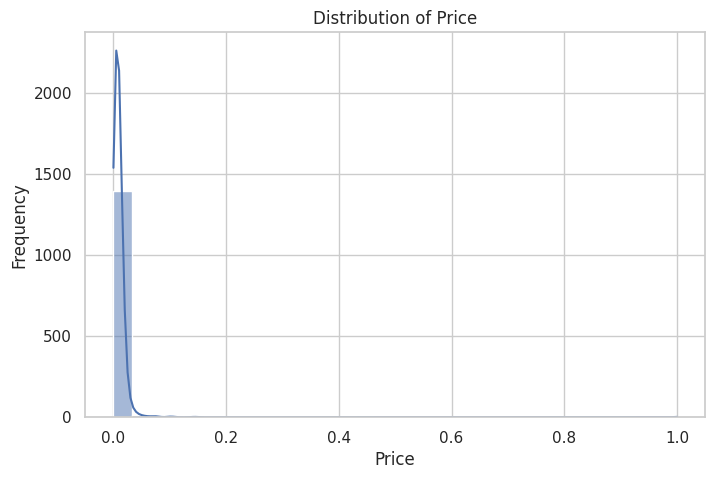

In [ ]:
# Set a visual style
sns.set(style="whitegrid")

# 2.1 Visualize Distributions
# Plot the distribution of 'Price'
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data['Price_log'] = np.log1p(data['Price'])  # Use log1p to handle zero values safely

NameError: name 'np' is not defined

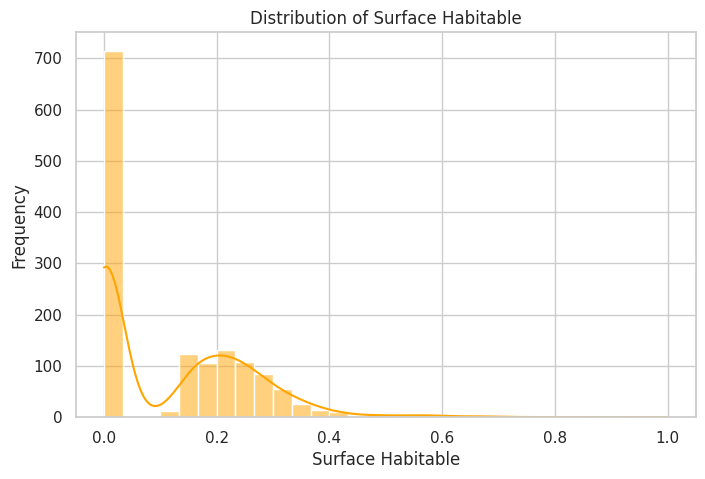

In [ ]:
# Plot the distribution of 'Surface habitable'
plt.figure(figsize=(8, 5))
sns.histplot(data['Surface habitable'], bins=30, kde=True, color="orange")
plt.title("Distribution of Surface Habitable")
plt.xlabel("Surface Habitable")
plt.ylabel("Frequency")
plt.show()

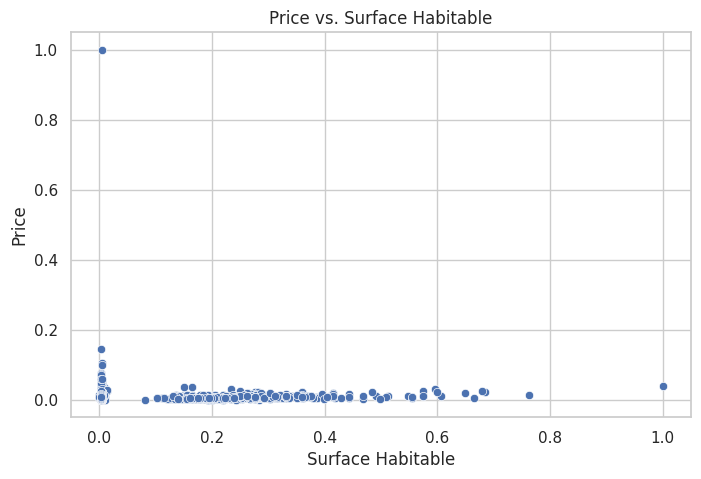

In [ ]:
# 2.2 Scatter Plot: Price vs. Surface Habitable
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Surface habitable', y='Price', data=data)
plt.title("Price vs. Surface Habitable")
plt.xlabel("Surface Habitable")
plt.ylabel("Price")
plt.show()

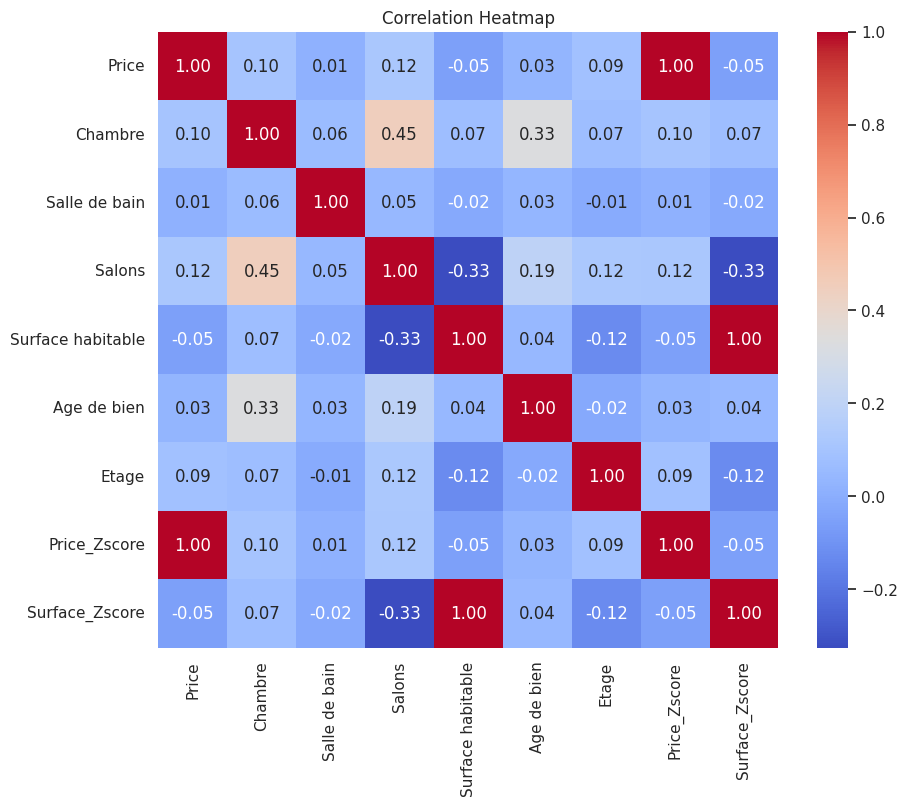

In [ ]:
# 2.3 Correlation Heatmap
# Select numerical columns for correlation
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare the data
# Select features and target variable
features = ['Surface habitable', 'Chambre', 'Salle de bain']  # Example features
target = 'Price'


In [ ]:
# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Train the Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 3. Predict and Evaluate
y_pred = reg_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 4.334433611434928e-05
R² Score: -0.0645969347303248


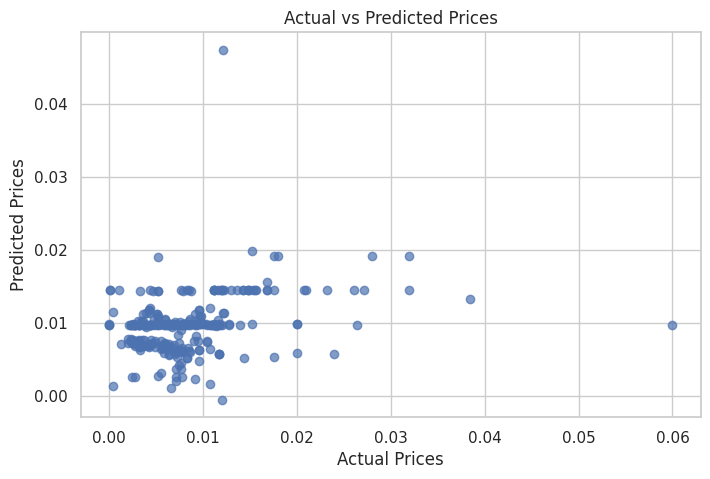

In [ ]:
# 4. Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare the data
# Binary target for classification
data['has_parking'] = data['Parking'].astype(int)
features = ['Surface habitable', 'Chambre', 'Salle de bain']
target = 'has_parking'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 3. Predict and Evaluate
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7640845070422535
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       215
           1       0.53      0.28      0.36        69

    accuracy                           0.76       284
   macro avg       0.66      0.60      0.61       284
weighted avg       0.73      0.76      0.74       284



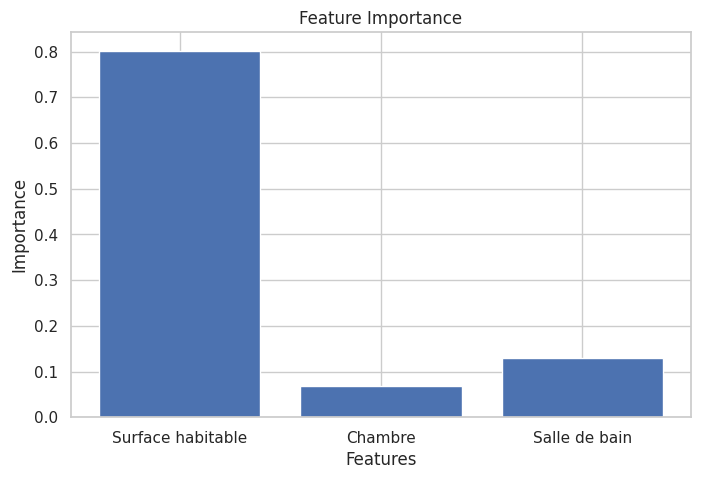

In [ ]:
# 4. Feature Importance Visualization
importances = clf.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()